# Scripts for plot of count of informative sites + number of bipartitions

## Import : 

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
from Bio import SeqIO

In [50]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['figure.dpi'] = 250

## Count of number of bipartions : 

### Set parameters /!\ TO DO 

In [171]:
i_deb = 1
i_fin = 2000 # TO DO : inter here the size of the windows
pas = 50 # TO DO : inter here the step
nb_col = 537 # TO DO : inter here the number of analysise windows 
win_nucl =[]
win_deb = {}
win_mil = {}
for i in range(1,nb_col+1):
    win_deb[i] = i_deb
    win_mil[i] = i_deb+ (i_fin/2)
    win_nucl.append((i_deb,i_fin))
    i_deb = i_deb + pas
    i_fin = i_fin + pas

### Import data /!\ TO DO 

In [41]:
#data = pd.read_csv('C:/Users/opale/Desktop/stage/recherche_perte_signal/rech_perte_signal_1000/sup50_250_56.csv')
#data2 = pd.read_csv('C:/Users/opale/Desktop/stage/recherche_perte_signal/rech_perte_signal_1000/sup50_500_56.csv')
#data3 = pd.read_csv('C:/Users/opale/Desktop/stage/recherche_perte_signal/rech_perte_signal_1000/sup50_1000_56.csv')
data4 = pd.read_csv('C:/Users/opale/Desktop/stage/recherche_perte_signal/rech_perte_signal_1000/sup50_2000_56.csv')

### Set rows (TO DO for every data) 

In [44]:
rows = [i for i in range(1100)]
rows2 = [i for i in range(972)]
rows3 = [i for i in range(793)]
rows4 = [i for i in range(627)]

### Count bipartitions (TO DO for every data in different variable )

In [45]:
nb_ligne4 = {}
nb_l = 0    
for column in data4.columns[2:] :
    corr_nucl = win_deb[int(column)]
    for seq in rows4 :        
        if data4[column][seq] > 0 :
            nb_l += 1
        if data4[column][seq] == 0 :
            pass
        
    if column == "1":  
        nb_ligne4[corr_nucl] = nb_l
    else: 
        nb_ligne4[corr_nucl] = nb_l
    nb_l = 0



### Plot 

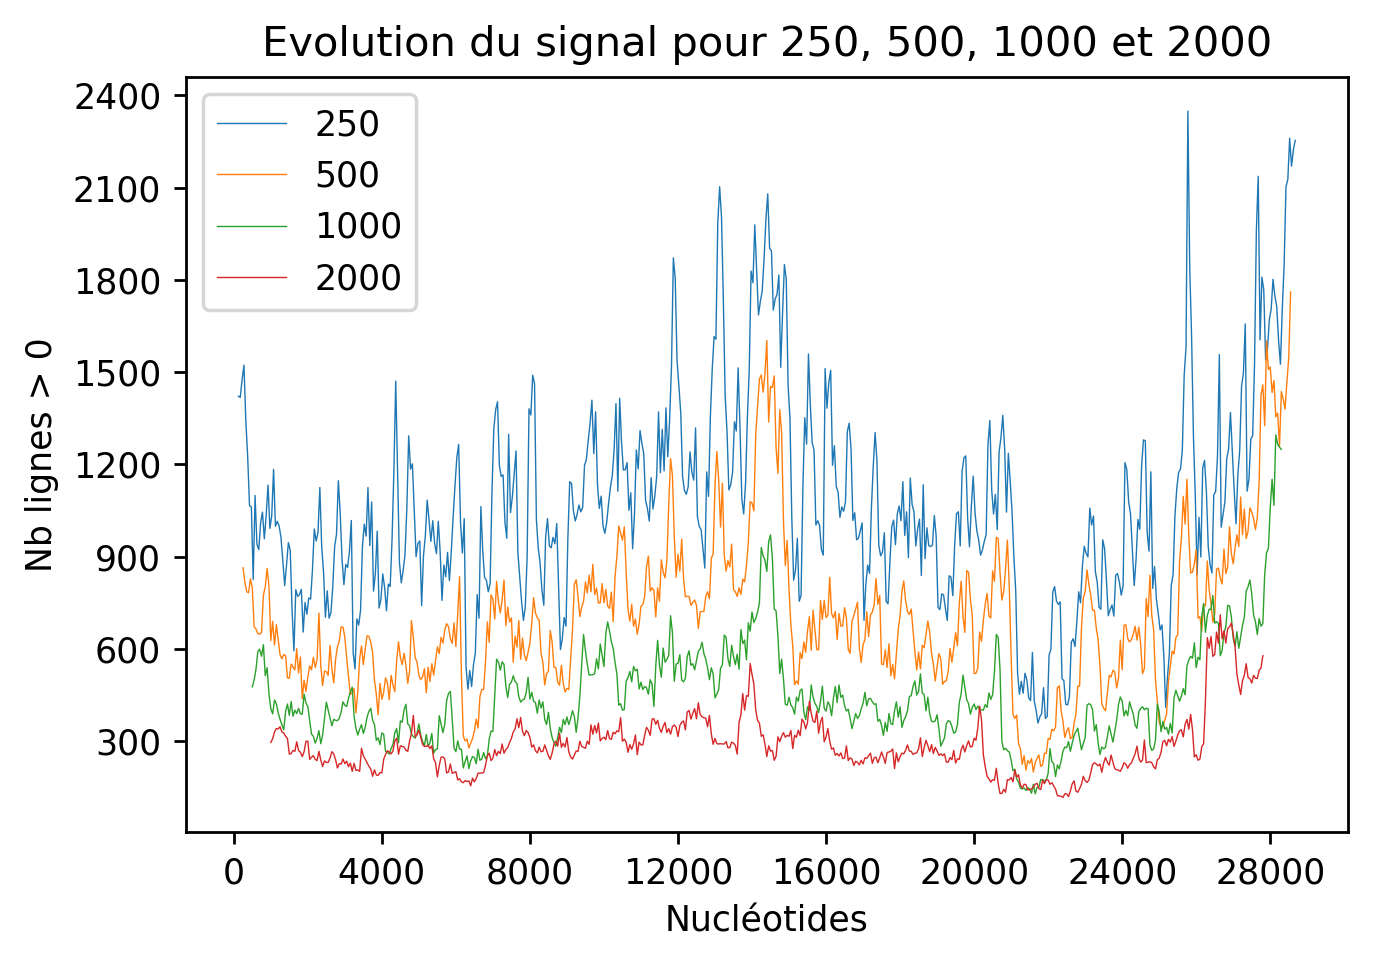

In [132]:
fig, ax = plt.subplots()
plt.plot(*zip(*sorted(nb_ligne.items())),linewidth=0.4, label = "250")
plt.plot(*zip(*sorted(nb_ligne2.items())),linewidth=0.4, label = "500")
plt.plot(*zip(*sorted(nb_ligne3.items())),linewidth=0.4, label = "1000")
plt.plot(*zip(*sorted(nb_ligne4.items())),linewidth=0.4, label = "2000")
plt.title("Evolution du signal pour 250, 500, 1000 et 2000")
plt.xlabel('Nucléotides')
plt.ylabel('Nb lignes > 0')
plt.legend()
ax.xaxis.set_major_locator(MultipleLocator(4000))
ax.yaxis.set_major_locator(MultipleLocator(300))
plt.savefig("C:/Users/opale/Desktop/stage/evol_signal_align_56.png")
plt.show()

## Count of informative sites

### Import fasta file 

In [58]:
with open("SARS_20210525_AH_redOK.fasta") as handle: # TO DO : insert the path of your fasta file
    for record in SeqIO.parse(handle, "fasta"):
        print(record.id)

AA_KY352407_Rsp_KY72
AB_NC014470_Rblasii_BM48_31
BA_MK211374_Rsp_BtRl
BB_KY417143_Rsinicus_Rs4081
BC_KY417149_Rsinicus_Rs4255
BD_MK211378_Raffinis_YN2018D
BE_KY417148_Rsinicus_Rs4247
BF_KY417147_Rsinicus_Rs4237
BG_KY417142_Astoliczkanus_As6526
BH_MK211377_Raffinis_YN2018C
BI_MK211375_Raffinis_YN2018A
BJ_DQ071615_Rpearsoni_Rp3
BK_KY417146_Rsinicus_Rs4231
BL_KY417150_Rsinicus_Rs4874
BM_NC004718_Hsapiens_Tor2d29
BN_KC881006_Rsinicus_Rs3367
BO_KC881005_Rsinicus_RsSHC014
BP_KY417144_Rsinicus_Rs4084
BQ_KY417151_Rsinicus_Rs7327
BR_KY417152_Rsinicus_Rs9401
BS_MK211376_Raffinis_YN2018B
BT_KY770858_Rsinicus_Anlong103
BU_KY417145_Rferrumequinum_Rf4092
BV_KP886808_Rferrumequinum_YNLF_31C
BW_KF569996_Raffinis_LYRa11
BX_EP1699443_Rstheno_RsYN03
BY_EP1699447_Rmalayanus_RmYN07
BZ_EP1699449_Rstheno_RsYN09
CA_KU973692_Rpusillus_F46
CB_KJ473814_Rsinicus_HuB2013
CC_DQ648857_Rmacrotis_279
CD_DQ412043_Rmacrotis_Rm1
CE_JX993987_Rpusillus_RpShaanxi
CF_KY770860_Rferrumequinum_Jiyuan84
CG_DQ412042_Rferrumequinu

### Create a dico with count of every nt

In [65]:
nt_dic = {}
# nts = ["N", "A", "T", "C", "G"]
for seq in SeqIO.parse("SARS_20210525_AH_redOK.fasta", "fasta"): # TO DO : inter the name of your fasta file
    for index, nt in enumerate(seq):
        pos = index + 1
        if pos not in nt_dic.keys():
            nt_dic[pos] = {}
        if nt not in nt_dic[pos]:
            nt_dic[pos][nt] = 0
        nt_dic[pos][nt] += 1
       

### Create a dico with informatives sites 

In [67]:
sites_inf = {}
cmpt = 0

for i in nt_dic :
    
    
    if len(nt_dic[i]) == 1 :
        sites_inf[i] = 0
        
    if len(nt_dic[i]) > 2 :
        sites_inf[i] = 1
        
    if len(nt_dic[i]) == 2 :        
        ke = []
        for key in nt_dic[i].keys() :
            ke.append(key)
            
        for k in ke : 
            if nt_dic[i][k] > 1 :
                cmpt += 1
                
        if cmpt == 2 :
            sites_inf[i] = 1
            
        if cmpt < 2:        
            sites_inf[i]= 0

        cmpt = 0
            

            
            
            
# 1 = site inf
# 0 = pas site inf

### Count by windows (TO DO with every windows size) 

In [172]:
nb_sites_2000 = {}
cmpt = 0

for j in win_mil.keys():
    print(j)
    i_deb= win_nucl[j-1][0]
    i_fin = win_nucl[j-1][1]
    
    for i in range(i_deb,i_fin+1) :
    
        if sites_inf[i] == 1 :
            cmpt += 1
    nb_sites_2000[win_mil[j]] = cmpt
    cmpt = 0    

    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [11]:
nb_sites_1000 = {}
cmpt = 0
cmpt2 = 0

for i in range (1,28750, 50) :
    ideb = i
    ifin = i+1000

    for j in range(ideb,ifin) :
        if sites_inf[j] == 1 :
            cmpt += 1
    nb_sites_1000[ideb] = cmpt
    cmpt = 0
    

### Plot 

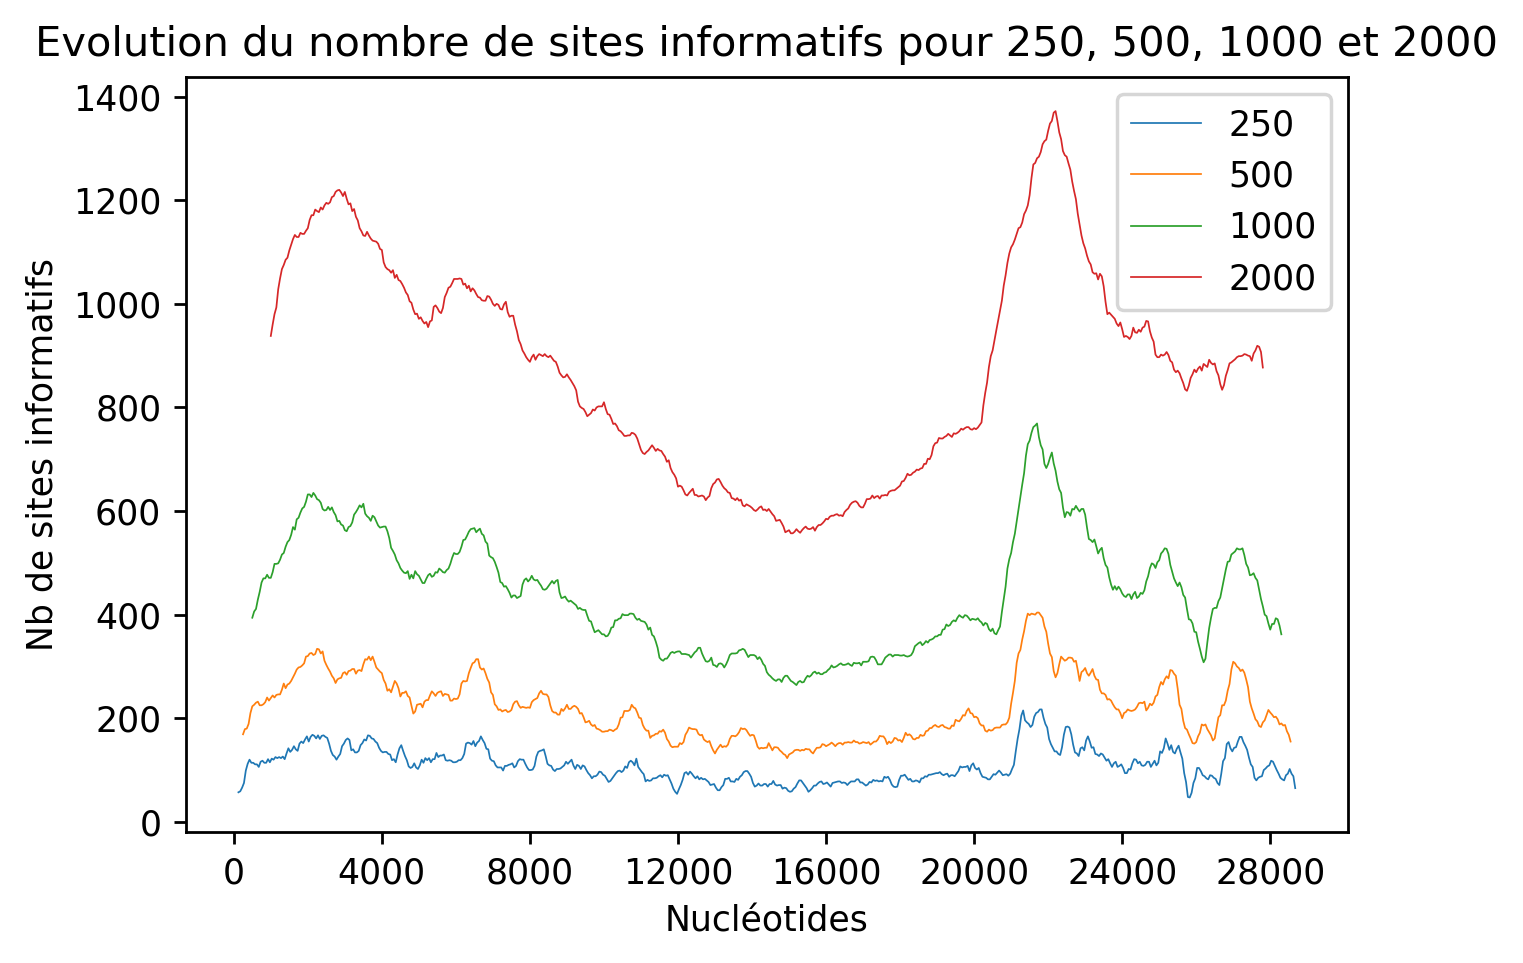

In [181]:
fig, ax = plt.subplots()
plt.plot(*zip(*sorted(nb_sites_250.items())),linewidth=0.5, label = "250")
plt.plot(*zip(*sorted(nb_sites_500.items())),linewidth=0.5, label = "500")
plt.plot(*zip(*sorted(nb_sites_1000.items())),linewidth=0.5, label = "1000")
plt.plot(*zip(*sorted(nb_sites_2000.items())),linewidth=0.5, label = "2000")
plt.title('Evolution du nombre de sites informatifs pour 250, 500, 1000 et 2000')
plt.xlabel('Nucléotides')
plt.ylabel('Nb de sites informatifs')
ax.xaxis.set_major_locator(MultipleLocator(4000))
plt.savefig("C:/Users/opale/Desktop/stage/sites_inf_align_56.png")
plt.legend()
plt.show()